In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
folder = '2021-05-27'

manipulowane = pd.read_csv("dane/{}/manipulowane.csv".format(folder))
straty = pd.read_csv("dane/{}/straty.csv".format(folder))
zaklocajace = pd.read_csv("dane/{}/zaklocajace.csv".format(folder))
zaklocane = pd.read_csv("dane/{}/zaklocane.csv".format(folder))

data = manipulowane
data = data.merge(straty, left_on="Czas", right_on="czas")\
    .merge(zaklocajace, left_on="Czas",right_on="Czas")\
    .merge(zaklocane, left_on="Czas",right_on="Czas")\
    .rename(columns = {#### ZMIENNE KONTROLOWANE
                       '001NIR0S600.daca.pv': 'S600', 
                       '001NIR0S500.daca.pv': 'S500', 
                       '001NIR0S300.daca.pv': 'S300',
                       '001NIR0S100.daca.pv': 'S100',
                       '001NIR0S00.daca.pv': 'S00',
                       '001NIR0SZR0.daca.pv': 'Strata_laczna',
                       '001NIR0SZRG.daca.pv': 'Strata_pasa',
                       #### ZMIENNE MANIPULOWANE 
                       '001FCx00285_SPPV.PV': 'Powietrze_dystrybucyjne',
                       '001XXXCALC01.NUM.PV[3]': 'Zawartosc_tlenu',
                       '001SCx00274_SPPV.PV': 'Predkosc_dmuchu',
                       '001FCx00241_sppv.pv': 'Nadawa_pylow',
                       '001FCx00231_SPPV.PV': 'Nadawa_1',
                       '001FCx00251_SPPV.PV': 'Nadawa_2',
                       #### ZMIENNE ZAKŁUCANE 
                       '001UCx00274.pv': 'Kat_dystrybucji',
                       'temp_zuz': 'Temperatura_zuzla',
                       '007SxR00555.daca1.pv': 'Drgania_kotla',
                       '001NIR0ODS0.daca.pv': 'Straty_odstojnika',
                       #### ZMIENNE ZAKŁUCAJACE 
                       # parametry zakłucające - technologiczne 
                       '001FYx00206_SPSUM.pv': 'Nadawa_mieszanki',
                       '001FYx00206_SPSUM.pv': 'Nadawa_koncentratu',
                       '001FCx00281.PV': 'Tlen_lanca',
                       '001FCx00262.PV': 'Tlen_procesowe',
                       '001FCx00261.PV': 'Powietrze_procesowe',
                       '001XXXCALC01.NUM.PV[2]': 'Przetlenienie',
                       # parametry zakłucające - fizyczne 
                       'poziom_zuzel': 'Poziom_topu', #miedz + zużel - więcej zazwcza lepiej, łatwiej kontrolowaćm 
                       #parametry fizykochemiczne mieszanki koncentratów 
                       'prob_corg': 'Zawartosc_wegla', 
                       'prob_s': 'Zawartosc_siarki', 
                       'sita_nadziarno': 'Udzial_nadziarna',
                       'sita_podziarno': 'Udzial_podziarna',
                      }, inplace = False)\
    .drop(columns=['czas',
                   'Unnamed: 5_x',
                   'Unnamed: 5_y'])


data.to_csv('data_{}.csv'.format(folder))

In [3]:
data

,Czas,Powietrze_dystrybucyjne,Zawartosc_tlenu,Predkosc_dmuchu,Nadawa_pylow,Strata_laczna,Strata_pasa,S600,S500,S300,...,Przetlenienie,Zawartosc_wegla,Zawartosc_siarki,Udzial_nadziarna,Udzial_podziarna,Poziom_topu,Kat_dystrybucji,Straty_odstojnika,Temperatura_zuzla,Drgania_kotla
0,2021-05-27 0:00:00,1600.0,65.0,44.0,5.0,13.360174,0.685186,1.406598,3.737449,3.498061,...,304.0,8.87,11.07,3.64,60.400002,240,9.590980,9.254807,1316,-1.560000
1,2021-05-27 0:00:01,1600.0,65.0,44.0,5.0,13.364485,0.685433,1.406957,3.738939,3.499644,...,304.0,8.87,11.07,3.64,60.400002,250,9.581735,9.253506,1316,-1.655392
2,2021-05-27 0:00:02,1600.0,65.0,44.0,5.0,13.368797,0.685680,1.407317,3.740430,3.501227,...,304.0,8.87,11.07,3.64,60.400002,250,9.572490,9.252207,1316,-1.716756
3,2021-05-27 0:00:03,1600.0,65.0,44.0,5.0,13.373110,0.685927,1.407676,3.741921,3.502811,...,304.0,8.87,11.07,3.64,60.400002,250,9.563245,9.250906,1316,-1.683526
4,2021-05-27 0:00:04,1600.0,65.0,44.0,5.0,13.377420,0.686174,1.408035,3.743412,3.504394,...,304.0,8.87,11.07,3.64,60.400002,250,9.554000,9.249607,1316,-1.877854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950395,2021-06-06 22:49:55,3000.0,72.0,50.0,24.0,17.705795,0.858735,1.462337,4.117548,5.318237,...,276.0,8.81,10.18,3.32,59.400002,1180,17.086479,10.113976,1301,0.622794
950396,2021-06-06 22:49:56,3000.0,72.0,50.0,24.0,17.707394,0.858851,1.462500,4.117713,5.318606,...,276.0,8.81,10.18,3.32,59.400002,1180,17.096081,10.115042,1301,0.684169
950397,2021-06-06 22:49:57,3000.0,72.0,50.0,24.0,17.708994,0.858968,1.462663,4.117879,5.318974,...,276.0,8.81,10.18,3.32,59.400002,1180,17.105686,10.116107,1301,0.711000
950398,2021-06-06 22:49:58,3000.0,72.0,50.0,24.0,17.710592,0.859084,1.462826,4.118045,5.319343,...,276.0,8.81,10.18,3.32,59.400002,1180,17.115292,10.117172,1301,0.581000


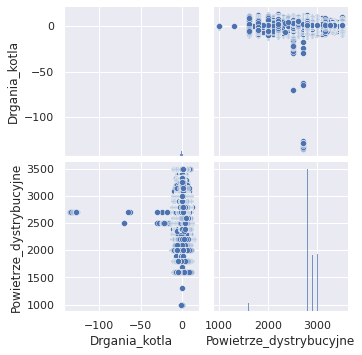

In [4]:
sns.pairplot(data[['Drgania_kotla','Powietrze_dystrybucyjne']])

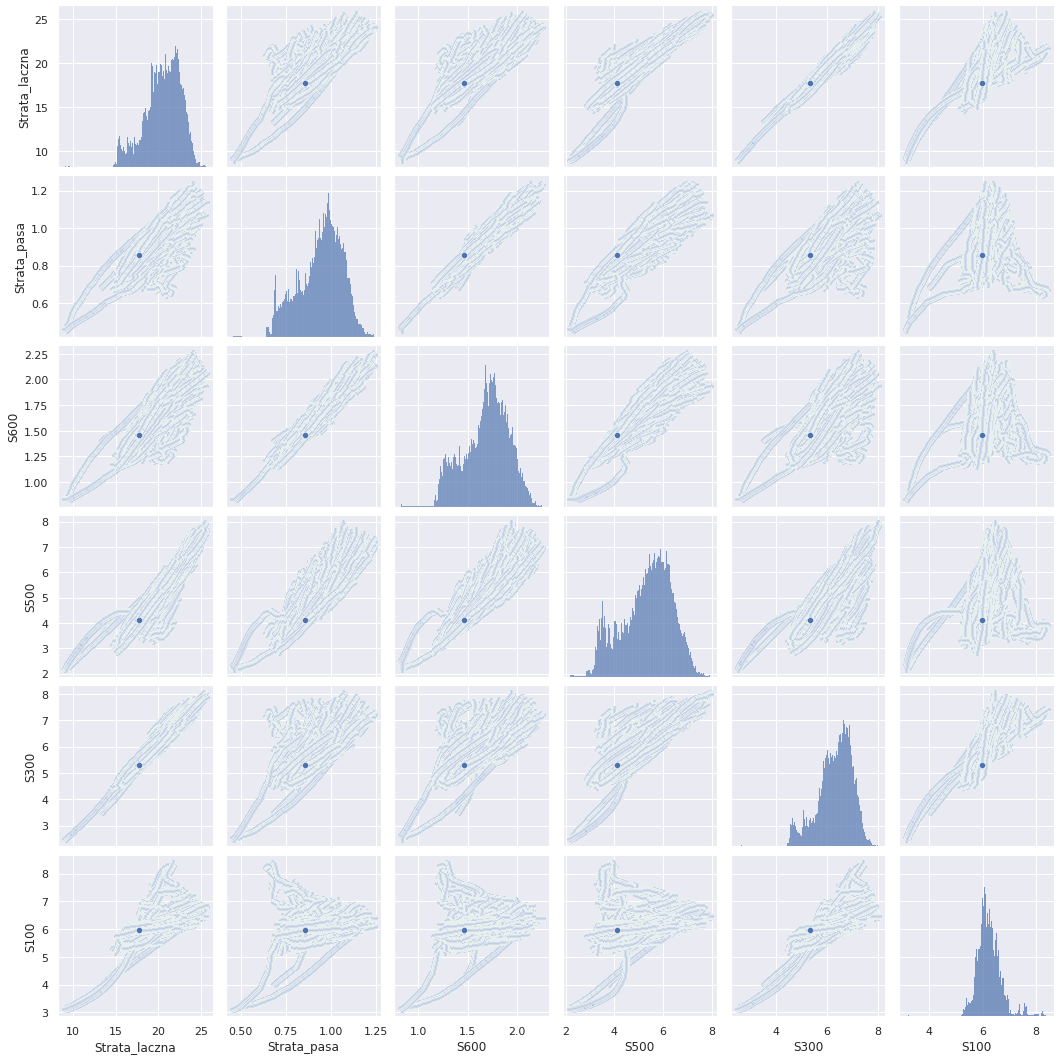

In [5]:
sns.pairplot(data.iloc[:,5:11])

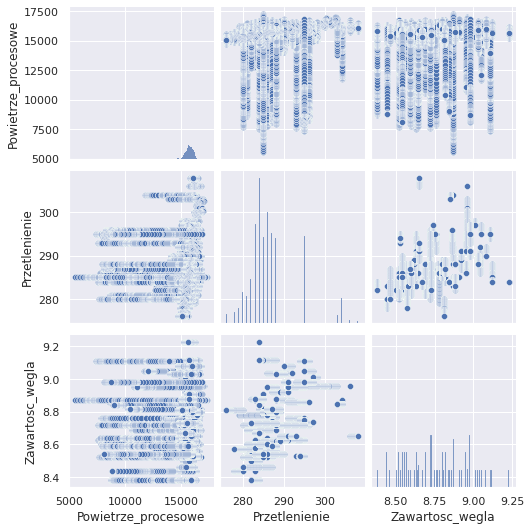

In [6]:
sns.pairplot(data.iloc[:,16:19])

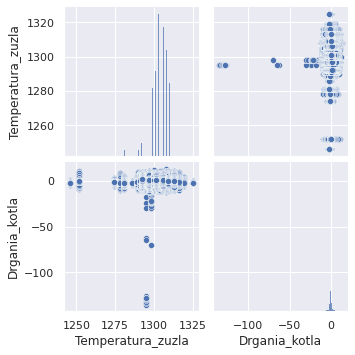

In [7]:
sns.pairplot(data.iloc[:,25:29])

In [8]:
#sns.pairplot(data)

<AxesSubplot:xlabel='Czas'>

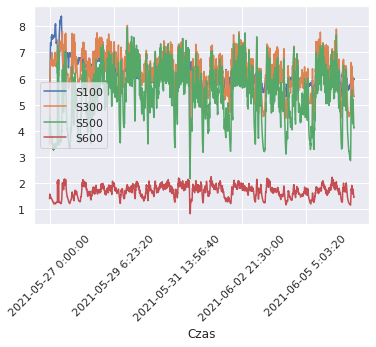

In [9]:
g = data[['Czas','S100','S300','S500','S600']].plot(x='Czas')
plt.xticks(rotation=45)
g

In [16]:
data[['Czas','S100','S300','S500','S600']].describe()

,S100,S300,S500,S600
count,950400.000000,950400.000000,950400.000000,950400.000000
mean,6.225821,6.330902,5.349516,1.686213
std,0.473983,0.691756,1.011000,0.228154
min,3.123293,2.483836,2.170058,0.831507
25%,5.958630,5.944090,4.690432,1.536129
50%,6.181543,6.441234,5.490961,1.717860
75%,6.459605,6.829589,6.105056,1.852580
max,8.387413,8.034328,7.937739,2.253447


In [23]:
for i in [6.225821,6.330902,5.349516,1.686213]:
    print(i/sum([6.225821,6.330902,5.349516,1.686213]))

0.317766301022455
0.32312964196620214
0.27303963791770425
0.08606441909363872


<AxesSubplot:>

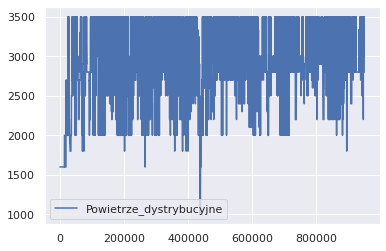

In [20]:
data[['Powietrze_dystrybucyjne']].plot()

In [11]:
data.columns

Index(['Czas', 'Powietrze_dystrybucyjne', 'Zawartosc_tlenu', 'Predkosc_dmuchu',
       'Nadawa_pylow', 'Strata_laczna', 'Strata_pasa', 'S600', 'S500', 'S300',
       'S100', 'Nadawa_koncentratu', 'Nadawa_1', 'Nadawa_2', 'Tlen_lanca',
       'Tlen_procesowe', 'Powietrze_procesowe', 'Przetlenienie',
       'Zawartosc_wegla', 'Zawartosc_siarki', 'Udzial_nadziarna',
       'Udzial_podziarna', 'Poziom_topu', 'Kat_dystrybucji',
       'Straty_odstojnika', 'Temperatura_zuzla', 'Drgania_kotla'],
      dtype='object')